In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Network_bayesian import Place_net, Grid_net, Coupled_Net
import brainpy as bp
import brainpy.math as bm
from matplotlib.animation import FuncAnimation
import time
from scipy.stats import ttest_ind, norm

# 保存数据为npz文件
data = np.load('decode_results.npz')
z_decode_gop = data['z_decode_gop']
z_decode_net = data['z_decode_net']

# 计算t-test结果并输出p值
t_stat, p_value = ttest_ind(z_decode_gop, z_decode_net)
print(f"T-test p-value: {p_value:.5f}")

# 设置字体
plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})

# 画图
plt.figure(figsize=(4, 4))
z_decode_all = np.concatenate([z_decode_gop, z_decode_net])
min_z = np.min(z_decode_all)
max_z = np.max(z_decode_all)

plt.plot(z_decode_net, z_decode_gop, '.', color='gray')
plt.xticks([29.9,30,30.1])
plt.yticks([29.9,30,30.1])
plt.plot([min_z, max_z], [min_z, max_z], 'k--')
plt.tight_layout()
plt.xlabel('Network decoded results')
plt.ylabel('GOP decoded results')
plt.axis('equal')  # 设置坐标轴比例相等
plt.savefig('net_gop_comparison.png')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 绘制z_decode_gop的直方图及高斯拟合
xmin, xmax = min_z, max_z
mu_gop, std_gop = norm.fit(z_decode_gop)
x_gop = np.linspace(xmin, xmax, 100)
p_gop = norm.pdf(x_gop, mu_gop, std_gop)
axes[0].hist(z_decode_gop, bins=30, density=True, alpha=0.6, color='g')
axes[0].plot(x_gop, p_gop, 'k--', linewidth=2)
axes[0].set_title('GOP Decoding')
axes[0].set_xlabel('z\_decode\_gop')
axes[0].set_ylabel('Density')

# 绘制z_decode_net的直方图及高斯拟合
mu_net, std_net = norm.fit(z_decode_net)
x_net = np.linspace(xmin, xmax, 100)
p_net = norm.pdf(x_net, mu_net, std_net)
axes[1].hist(z_decode_net, bins=30, density=True, alpha=0.6, color='b')
axes[1].plot(x_net, p_net, 'k--', linewidth=2)
axes[1].set_title('Net Decoding')
axes[1].set_xlabel('z\_decode\_net')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.savefig('decode_histograms.png')
plt.show()

# 绘制标准化的概率密度函数
plt.figure()
plt.plot(x_net, p_net / np.sum(p_net), label='Net Decoding')
plt.plot(x_gop, p_gop / np.sum(p_gop), label='GOP Decoding')
plt.xlabel('Value')
plt.ylabel('Normalized Density')
plt.legend()
plt.savefig('normalized_density.eps')
plt.show()


KeyError: 'z_decode_gop is not a file in the archive'

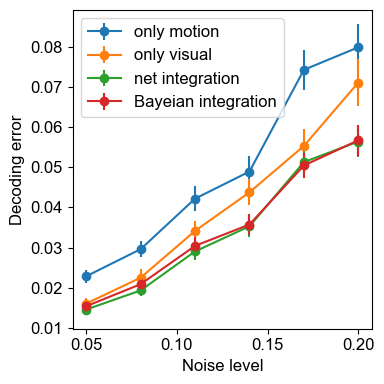

In [9]:

# 保存数据为npz文件
data = np.load('data/results.npz')
mean_integrate_net = data['mean_integrate_net']
mean_motion_net = data['mean_motion_net']
mean_visual_net = data['mean_visual_net']
mean_integrate_gop = data['mean_integrate_gop']
std_integrate_net = data['std_integrate_net']
std_motion_net = data['std_motion_net']
std_visual_net = data['std_visual_net']
std_integrate_gop = data['std_integrate_gop']

n_stre = 6
noise_stre = np.linspace(0.05, 0.2, n_stre)

plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})

# 画图
plt.figure(figsize=(4, 4))
plt.errorbar(noise_stre, mean_motion_net, yerr=std_motion_net/10, fmt='-o',label='only motion')
plt.errorbar(noise_stre, mean_visual_net, yerr=std_visual_net/10, fmt='-o',label='only visual')
plt.errorbar(noise_stre, mean_integrate_net, yerr=std_integrate_net/10, fmt='-o',label='net integration')
plt.errorbar(noise_stre, mean_integrate_gop, yerr=std_integrate_gop/10, fmt='-o',label='Bayeian integration')
plt.xlabel('Noise level')
plt.ylabel('Decoding error')
plt.legend()


# plt.errorbar(noise_stre, mean_motion_net, yerr=std_motion_net, fmt='-o')
# plt.errorbar(noise_stre, mean_visual_net, yerr=std_visual_net, fmt='-o')
# plt.errorbar(noise_stre, mean_integrate_net, yerr=std_integrate_net, fmt='-o')
# plt.errorbar(noise_stre, mean_integrate_gop-30, yerr=std_integrate_gop, fmt='-o')

plt.tight_layout()
plt.savefig('figures/Bayesian_integration.png')
plt.show()
